Привет! Меня зовут Исмаил, я буду проверять твой проект :) Можешь обращаться ко мне на «ты». Если тебе комфортно, то и я буду к тебе так обращаться, если нет, то обязательно скажи об этом.

Пожалуйста, не удаляй мои комментарии, которые я буду оставлять в работе. Это особенно поможет, если твои проекты будут отправлены на повторную проверку. При повторных проверках у комментариев будут приписки: "Вторая итерация", "Третья итерация" и т.д. 

Ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались от моих: например, выделяй их своим любимым цветом — так у нас не возникнет путаницы :)

Кстати, про цвета! Мои комментарии будут в следующей цветовой гамме: зелеными, желтыми и красными. Например:

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
В случае, если решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
В случае, если решение может стать еще лучше с некоторыми корректировками </div>
 
<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

<div class="alert-info"> 
<b>Комментарий студента ❌</b> 
    Я не очень поняла, что делать с визуализацией. Так как этого не было в теории не очень понятно, какую выбрать и с чем использовать... Надо визуализировать все модели? Но их много выходит. И разве визуализация не будет отражать очевидное. То есть мы выбрали модель, у которой больше всего правильных ответов, зачем тогда остальные визуализировать? 
 </div>

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация </b>

"Так как этого не было в теории" - ну, поэтому это лишь предложение поработать самостоятельно, не красный комментарий, можно и не исправлять)
  
Визуализация отображает не качество разных моделей, скорее, а то, как качество внутри какой-либо зависит от значений разных гиперпараметров
    
Из курсов и дополнительной информации советую Yandex ML Handbook (https://academy.yandex.ru/handbook/ml) и курсы Евгения Соколова на ФКН (Машинное обучение - 1 с математикой https://github.com/esokolov/ml-course-hse и Основы машинного обучения без глубокой математики https://github.com/hse-ds/iad-intro-ds) - там можешь получить дополнительную информацию, более глубокую, возможно. http://wiki.cs.hse.ru/Заглавная_страница - тут можешь глянуть записи семинаров и лекций и другие материалы соответствующих курсов. Если говорить про визуализацию в Питоне, то могу посоветовать следующие ноутбуки: 1. https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb 2. https://github.com/Palladain/Deep_Python/blob/main/Lectures/Lecture_4/Lecture_4_Python.ipynb

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [75]:
# !pip install yellowbrick

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [77]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [78]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [79]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [80]:
df.info

<bound method DataFrame.info of       calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]>


<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 

Стоит еще выволить .info

## Разбейте данные на выборки

In [81]:
features = df.drop('is_ultra', axis = 1)
target = df['is_ultra']

In [82]:
features_train, features_other, target_train, target_other = train_test_split(
features, target, test_size=0.5, random_state=12345)

In [83]:
features_valid, features_test, target_valid, target_test = train_test_split(
features_other, target_other, test_size=0.5, random_state=12345)

In [84]:
features_train.shape

(1607, 4)

In [85]:
target_train.shape

(1607,)

In [86]:
features_valid.shape

(803, 4)

In [87]:
features_test.shape

(804, 4)

In [88]:
target_valid.shape

(803,)

In [89]:
target_test.shape

(804,)

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Стоит еще выводить размеры выборок для проверки, все ли прошло успешно. Например, с помощью shape

## Исследуйте модели

### Решающее дерево

Сначала построим модель с помощью решающего дерева. Проверим влияние критерия разделения дерева (Gini или Entropy) и глубину от 1 до 6.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


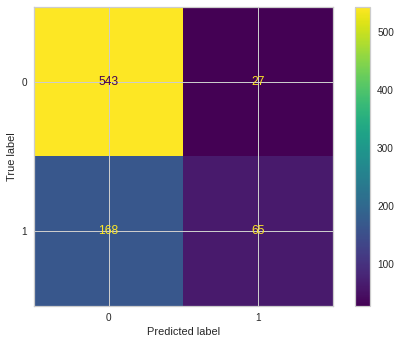

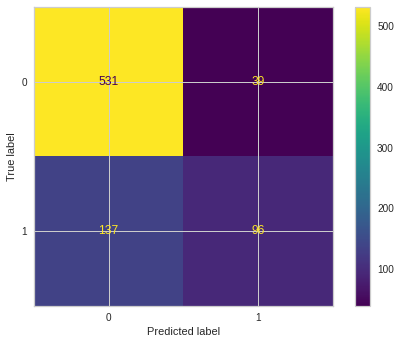

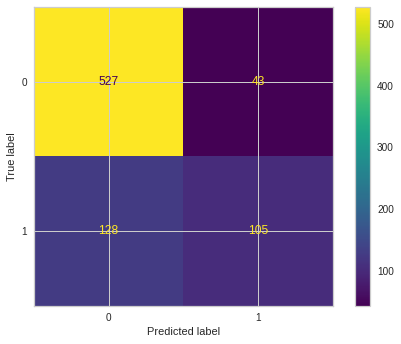

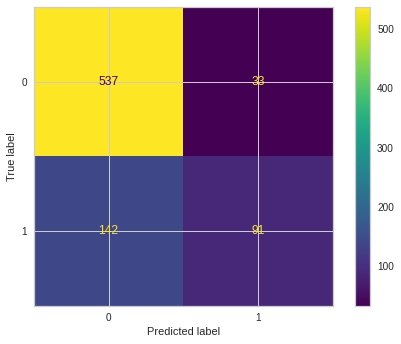

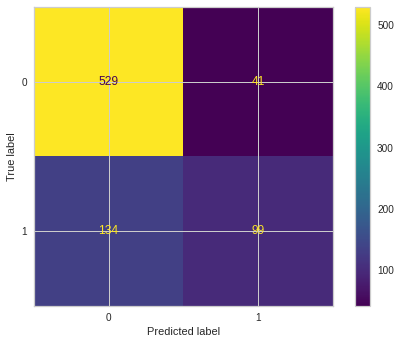

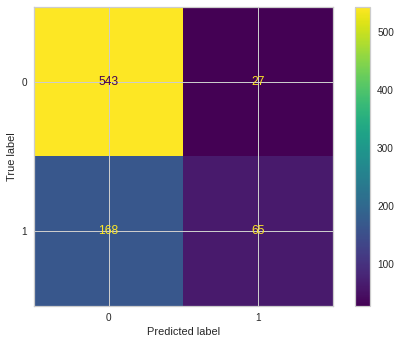

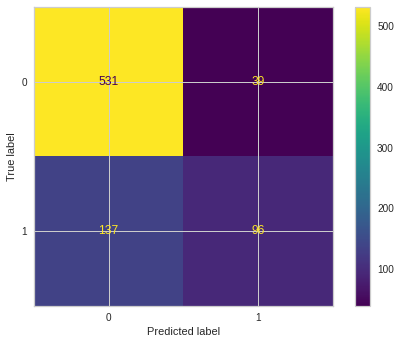

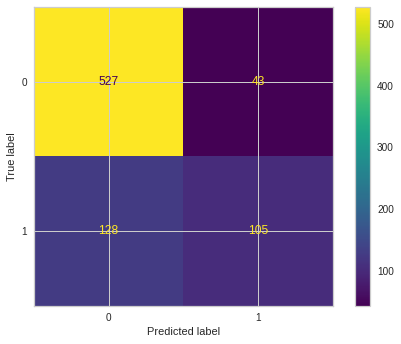

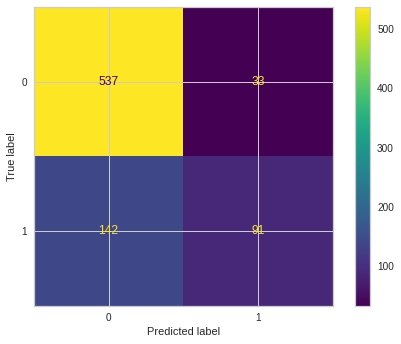

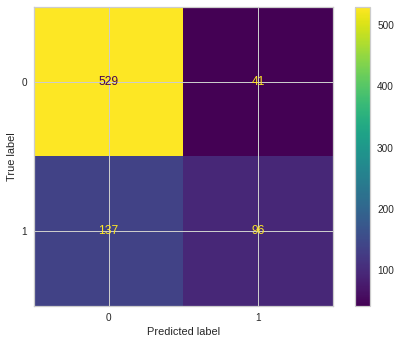

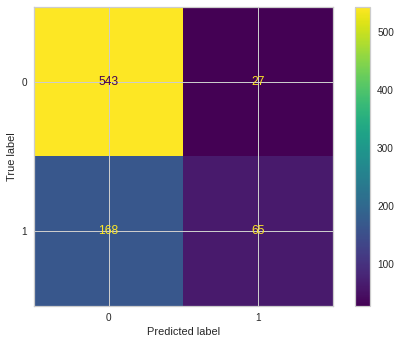

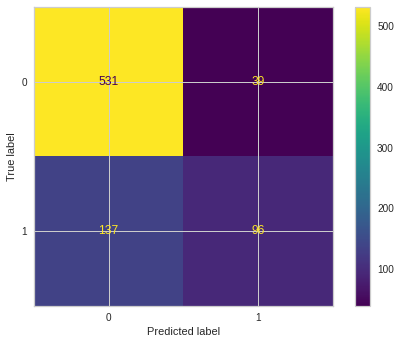

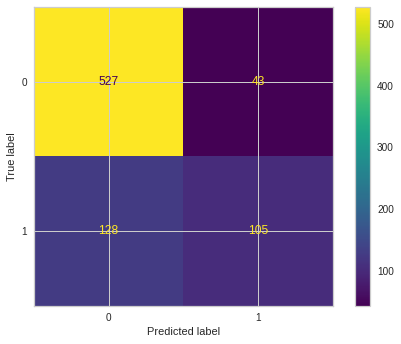

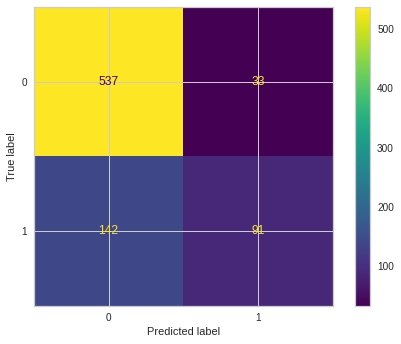

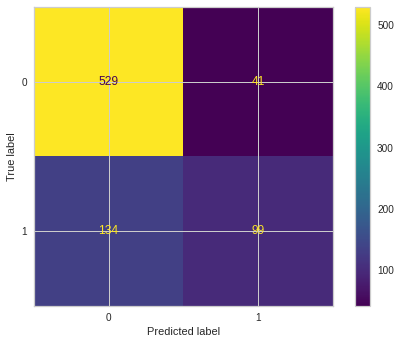

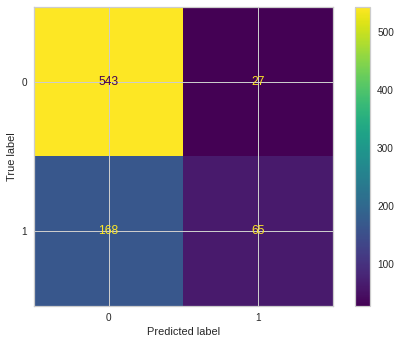

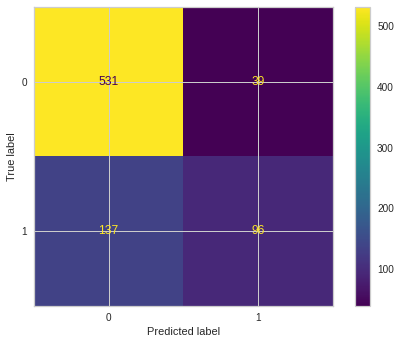

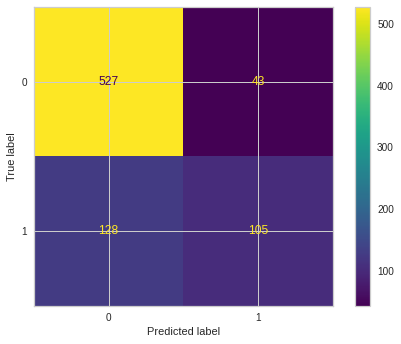

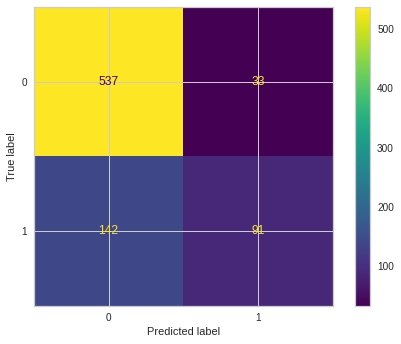

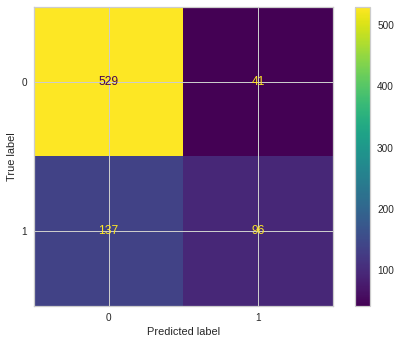

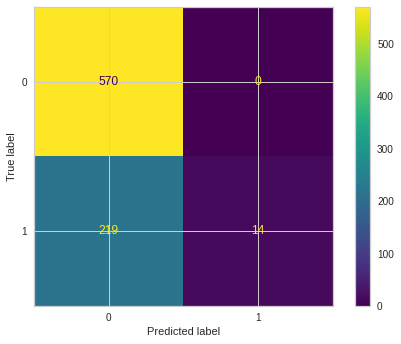

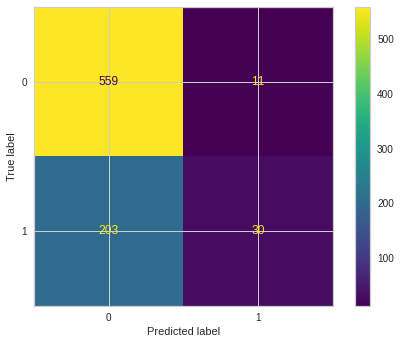

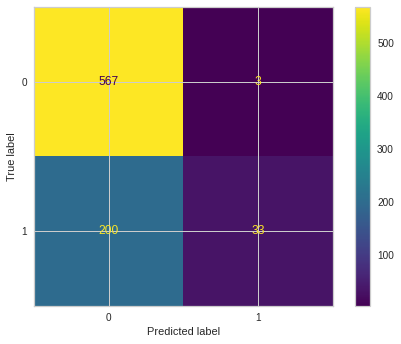

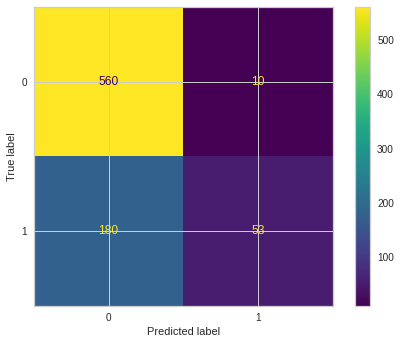

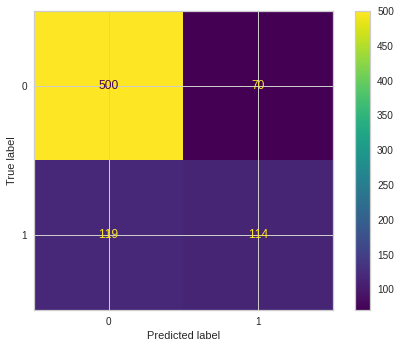

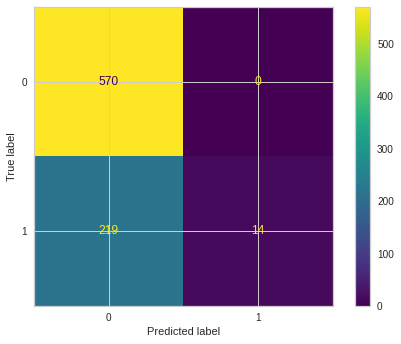

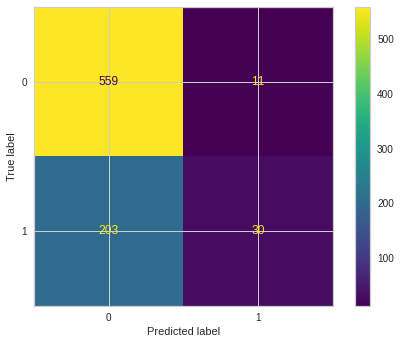

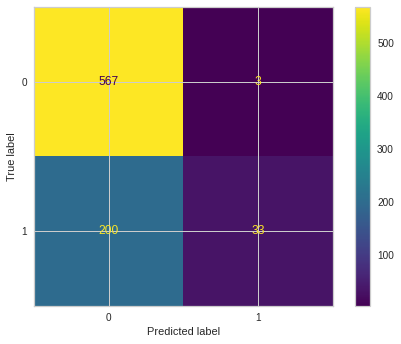

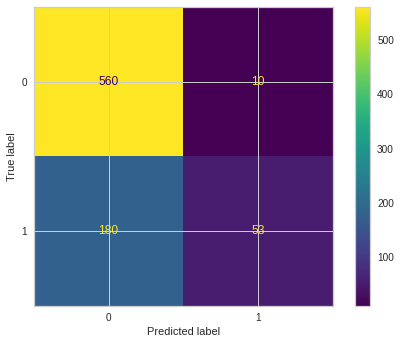

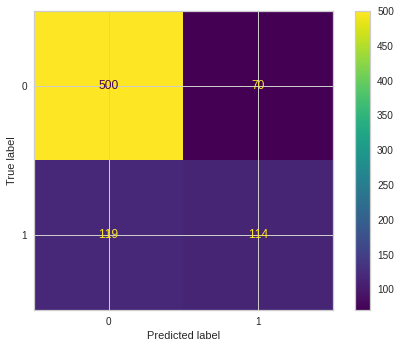

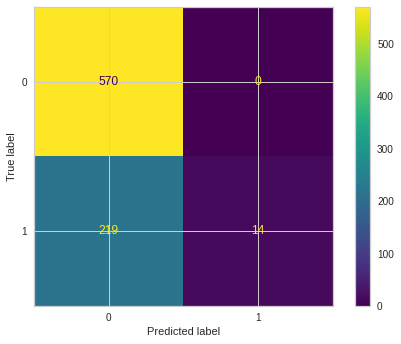

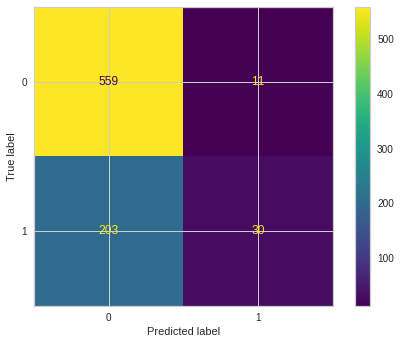

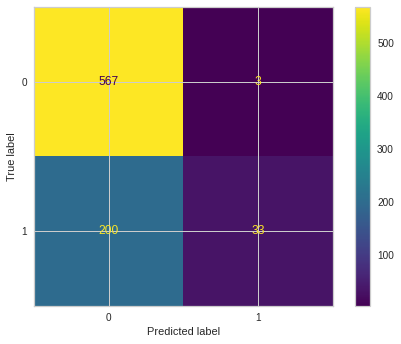

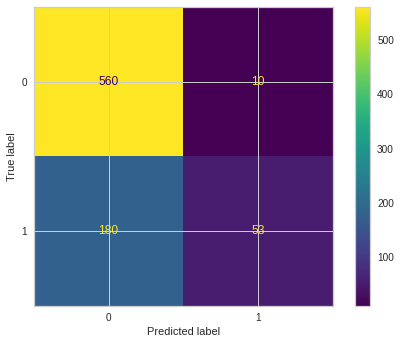

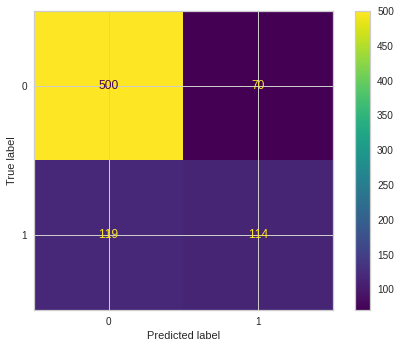

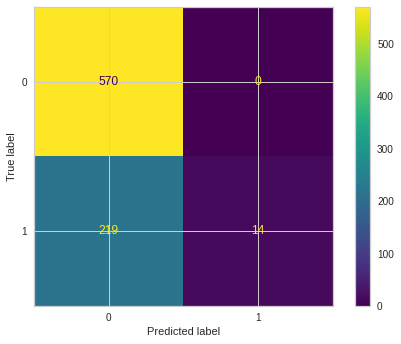

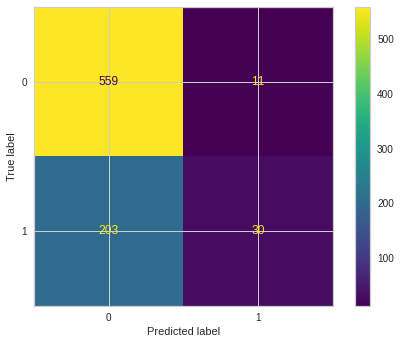

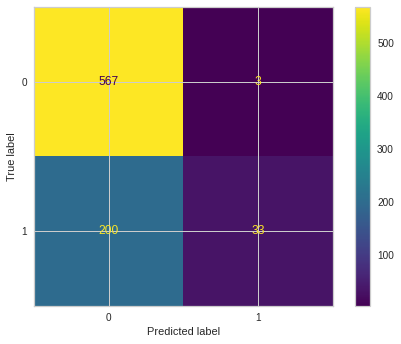

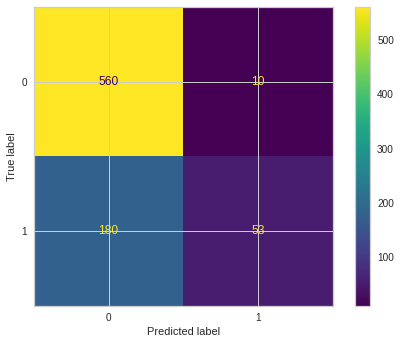

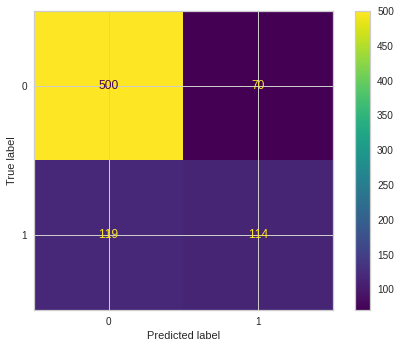

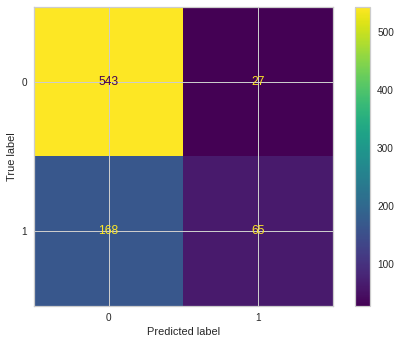

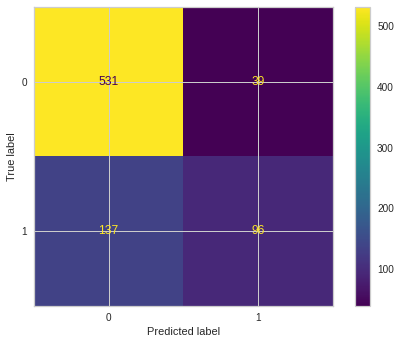

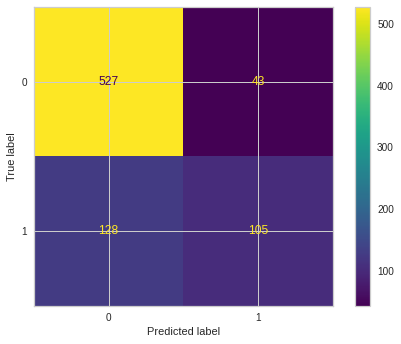

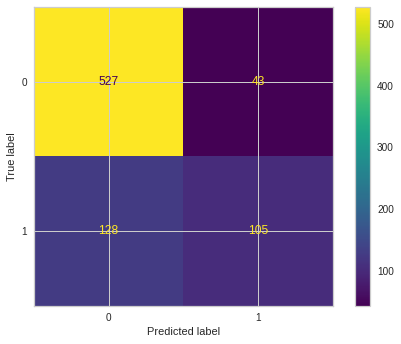

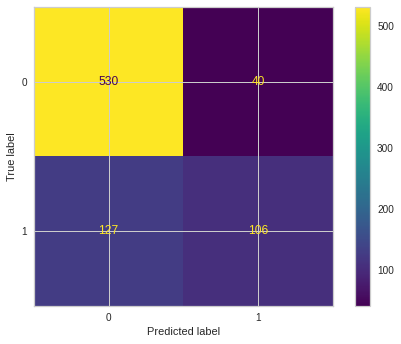

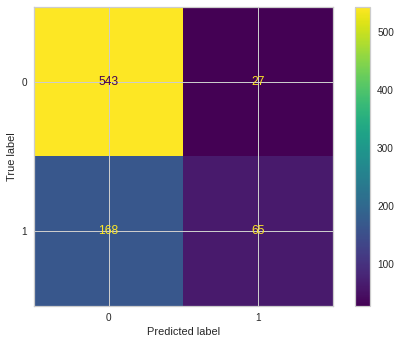

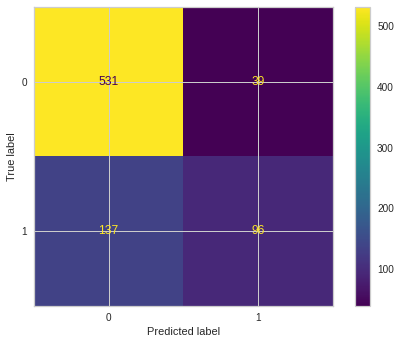

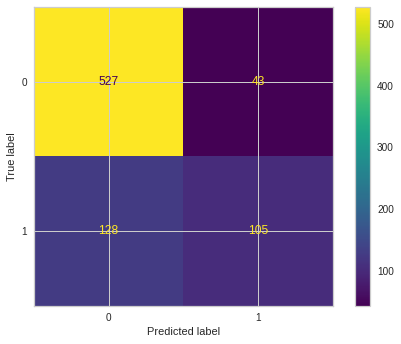

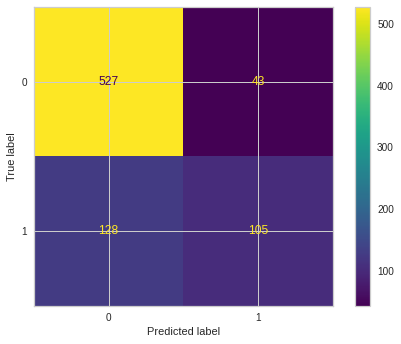

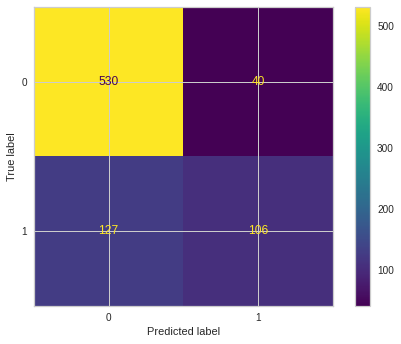

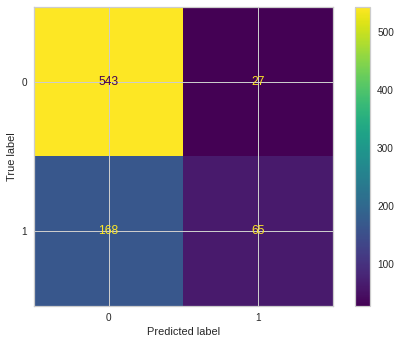

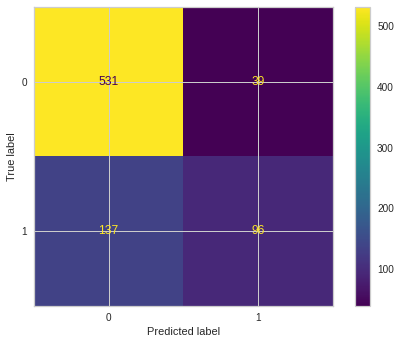

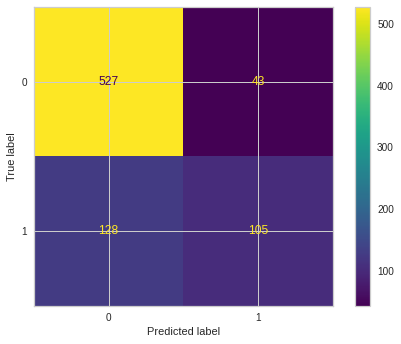

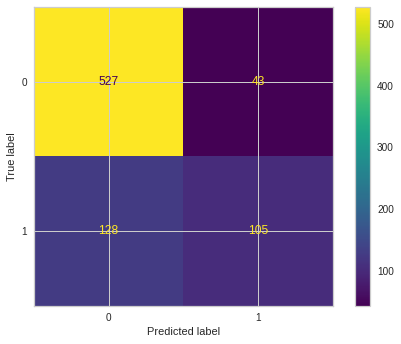

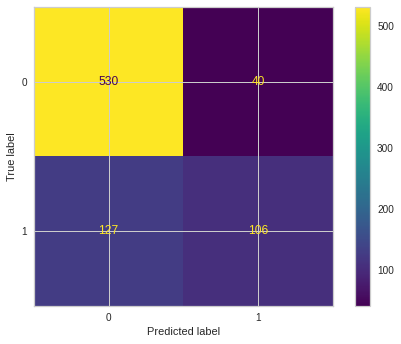

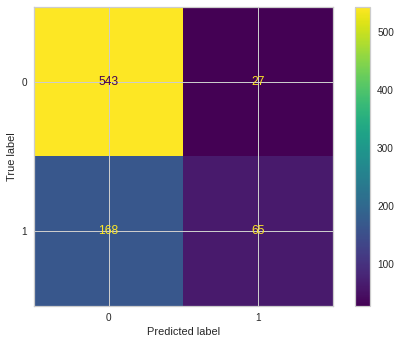

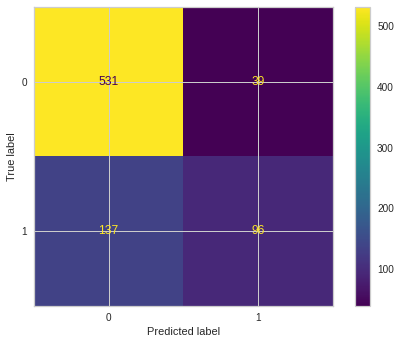

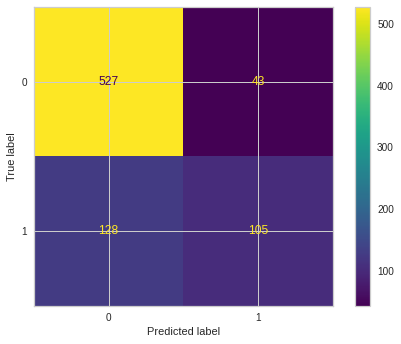

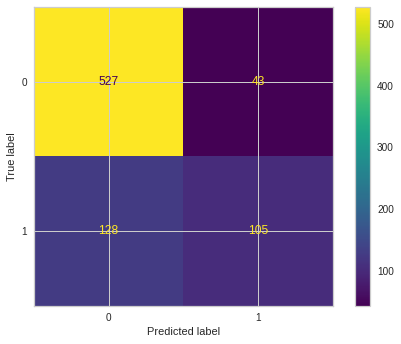

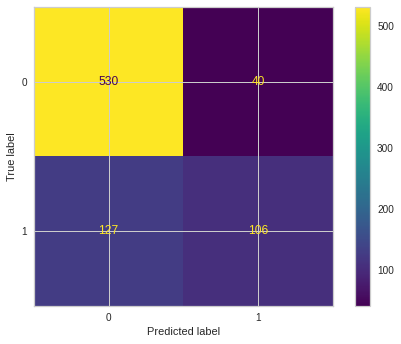

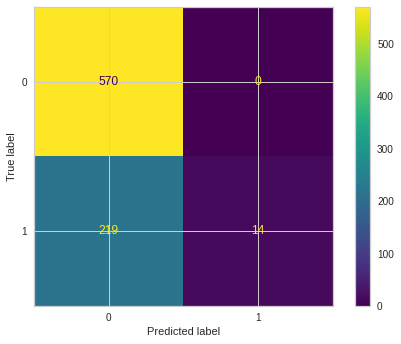

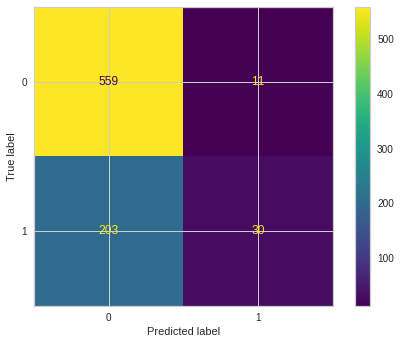

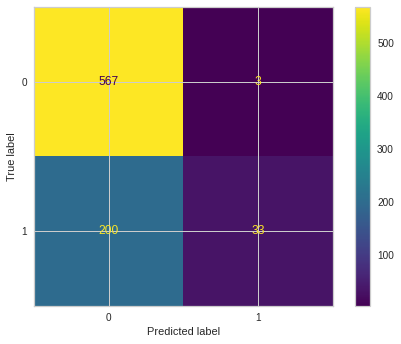

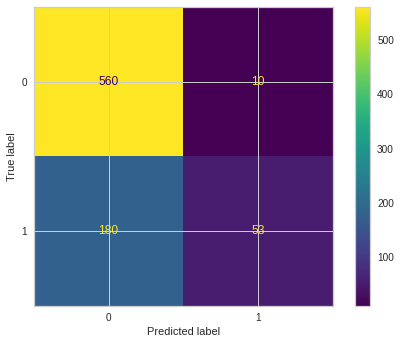

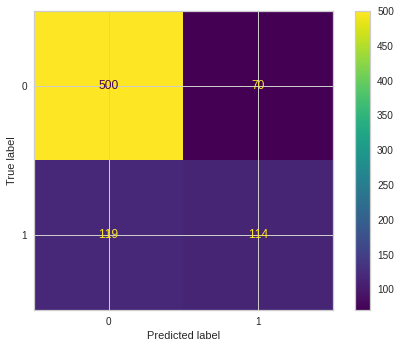

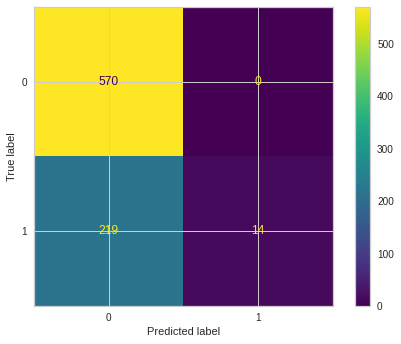

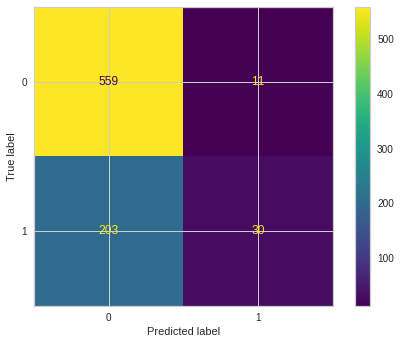

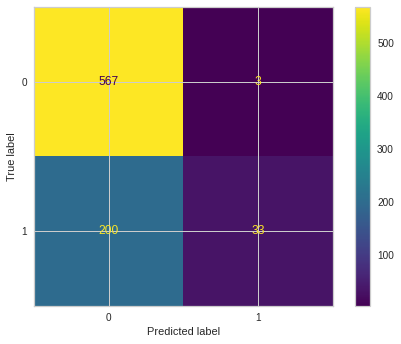

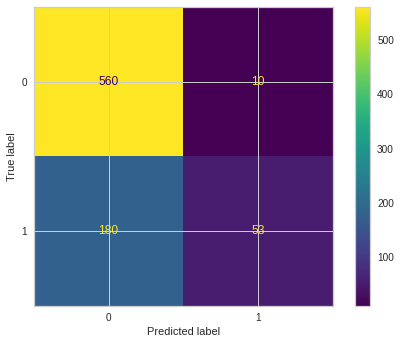

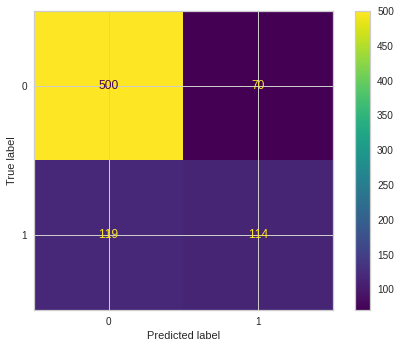

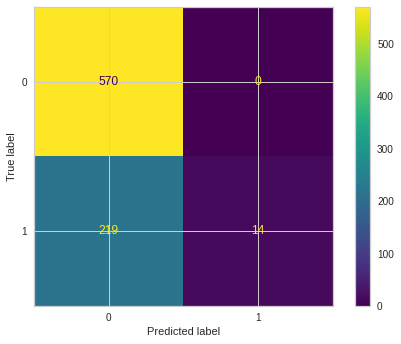

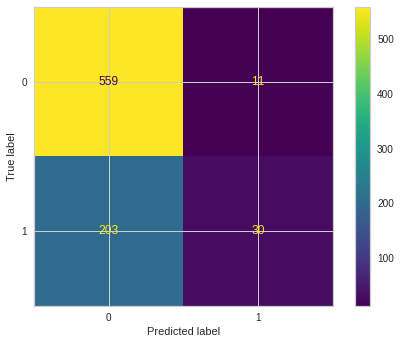

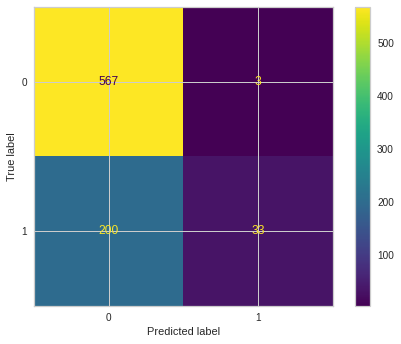

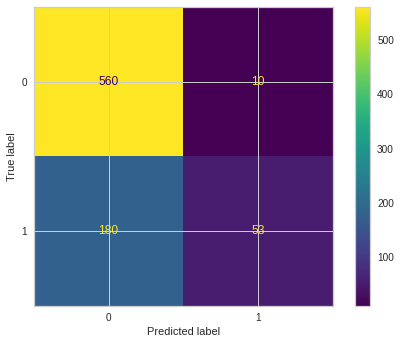

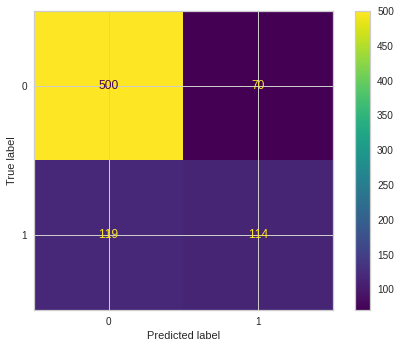

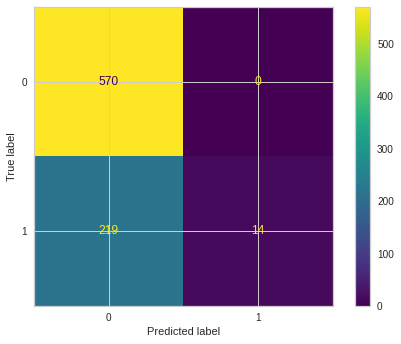

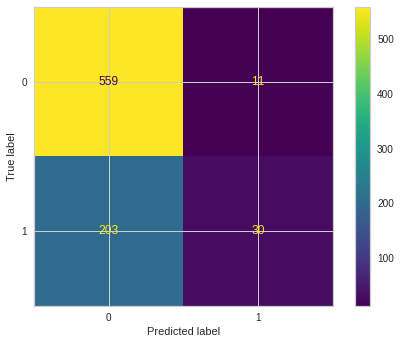

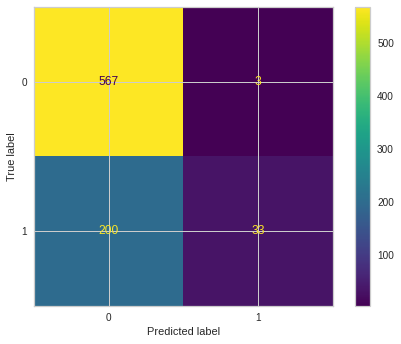

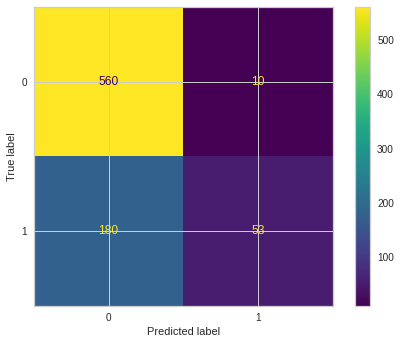

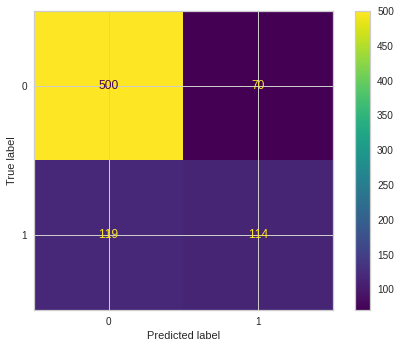

In [90]:
criterion_model = ['gini', 'entropy']
splitter_model = ['best', 'random']

best_model_dtc = None
best_result_dtc = 0

for crit in criterion_model:
    for split in splitter_model:
        for min_split in range(2, 4):
            for min_leaf in range(1, 3):
                for depth in range(1, 6):
                    model = DecisionTreeClassifier(random_state=12345, criterion = crit, splitter = split,
                                                   min_samples_leaf = min_leaf, max_depth = depth)
                    model.fit(features_train, target_train)
                    predictions_valid = model.predict(features_valid)
                    result = accuracy_score(target_valid, predictions_valid)
                    cm = confusion_matrix(target_valid, predictions_valid, labels = model.classes_)
                    cm
                    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
                    disp.plot();
                    if result > best_result_dtc:
                        best_model_dtc = model
                        best_result_dtc = result


In [91]:
print('Accuracy лучшей модели:', best_result_dtc)
print(f'Лучшая модель: {best_model_dtc}')

Accuracy лучшей модели: 0.7920298879202988
Лучшая модель: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=12345)


Лучшая модель с критерием 'entropy' и глубиной дерева решений 5 предсказала результаты с отчностью 0.792. Значения гиперпараметров в модели осталось дефолтным: splitter - 'best', min_samples_leaf - 1, min_samples_leaf - 2.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

Рассмотрен только один гиперпараметр. Хотелось бы побольше что-нибудь увидеть

Далее рассмотрим еще два вида моделей для сравнения.

### Случайный лес

In [92]:
best_model_rfc = None
best_result_rfc = 0
for est in range(1, 11):
    for min_split in range(2, 4):
        for min_leaf in range(1, 3):
            for crit in criterion_model:
                model = RandomForestClassifier(random_state=12345, criterion = crit, n_estimators=est, 
                                               min_samples_split = min_split, min_samples_leaf = min_leaf) 
                model.fit(features_train, target_train) 
                result = model.score(features_valid, target_valid) 
                if result > best_result_rfc:
                    best_model_rfc = model 
                    best_result_rfc = result 
print('Accuracy лучшей модели:', best_result_rfc)
print(f'Лучшая модель: {best_model_rfc}')

Accuracy лучшей модели: 0.7870485678704857
Лучшая модель: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=12345)


Accuracy лучшей модели методом случайного леса ниже, чем у лучшей модели решающего дерева. 

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

Аналогично с прошлым комментарием, у леса можно много чего глянуть

Попробуем использовать логистическую регрессию.

### Логистическая регрессии

In [93]:
model_iter = [100, 500, 1000]

best_model_lr = None
best_result_lr = 0
for moditer in model_iter:
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=moditer)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = model.score(features_valid, target_valid) 
    if result > best_result_lr:
        best_model_lr = model
        best_result_lr = result

print('Accuracy лучшей модели:', best_result_lr)
print(f'Лучшая модель: {best_model_lr}')

Accuracy лучшей модели: 0.7471980074719801
Лучшая модель: LogisticRegression(random_state=12345)


Accuracy лучшей модели, построенной с помощью логистической регрессии, ниже, чем у других методов.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Ко всему пукнту </b> 
    
Accuracy - это не точность, а доля правильных ответов. Точность - другая метрика, precision

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b>

Не выполнен пункт: "Кратко напишите выводы исследования"

## Проверьте модель на тестовой выборке

Самую высокую точность показало решающее дерево с параметром entropy и глубиной 5. Проверим качество этой модели на тестовой выборке.

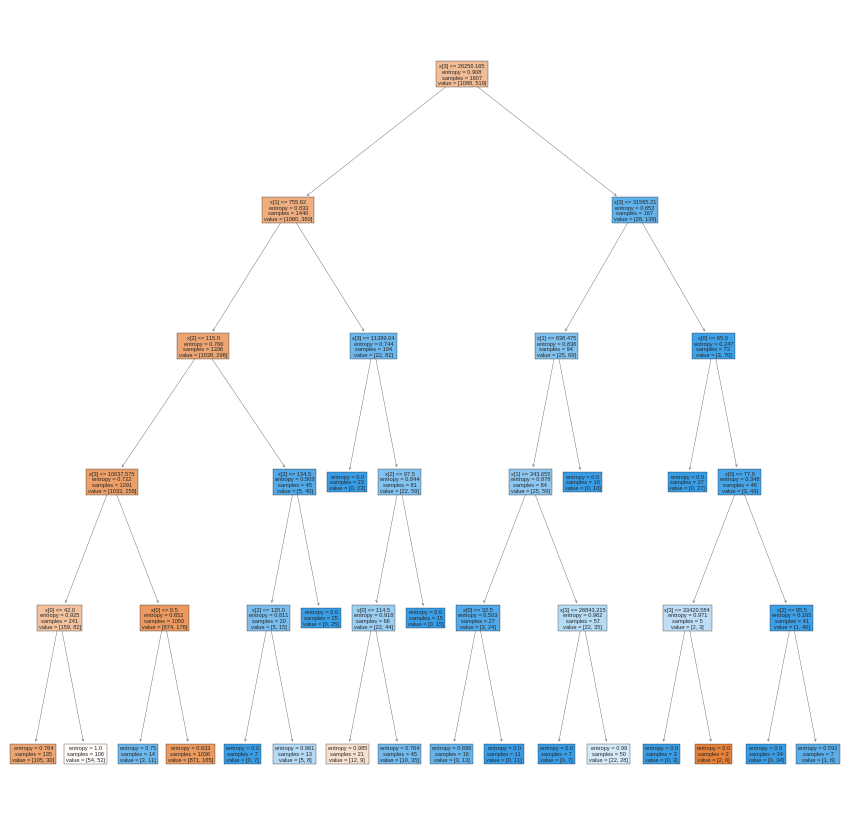

In [94]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=12345)
final_model.fit(features_train, target_train)
prediction_test = final_model.predict(features_test)
accuracy_score(target_test, prediction_test)

plt.figure(figsize=(15,15))
plot_tree(final_model, filled=True, impurity=True);


Постоим матрицу ошибок.

In [95]:
cm = confusion_matrix(target_test, prediction_test, labels = final_model.classes_)
cm

array([[542,  29],
       [132, 101]])

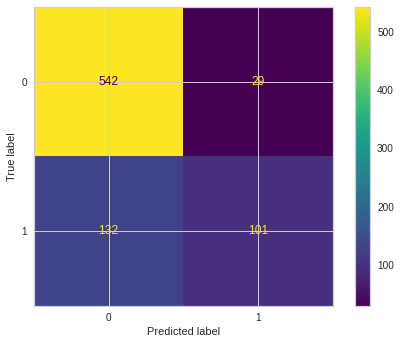

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = final_model.classes_)
disp.plot();

Качество модели осталось достаточно высоким - 80% верных предсказаний.


<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Модель проверена на тесте

## (бонус) Проверьте модели на адекватность

Проверим баланс классов.

In [97]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Тариф Смарт в выборке появляется в два раза чаще.

## Вывод

В ходе проекта мы проверили несколько моделей, созданных методом решающего дерева, случайного леса и логичстической регрессии. Изменяя гиперпараметры, мы выяснили, что лучше всего предсказывает выбор клиентами новых тарифов модель, обученная методом решающего дерева со всеми базовыми гиперпарамертами, кроме критерия разделения дерева - его мы заменили на entropy. 
Проверка качества модели на тестовых данных показала, что модель хорошо справляется с предсказанием, правильно определяя категории для 80% данных. Однако классы исходного датасета несбалансированы - тариф Ультра занимает только 30% от всей выборки, что может повлиять на корректность работы модели.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 </b>

Можно посмотреть на баланс классов: например, если у нас 90 процентов таргета это "1", а остальные 10 - "0", то мы можем тупо выдавать каждый раз цифру 1 и получать метрику 90 %. Любая модель, которая будет выдавать качество ниже этого - плохая/неадекватная

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b>

Хороший проект, тобою проделана большая работа, ты молодец!

Хороший код, показываешь навыки владения sklearn. Все требуемые пункты в задании в целом выполнены. Оставил пару желтых комментариев, думаю, это сможет улучшить твой проект. Также можно добавить визуализацию в проект: посмотреть на графиках, как влияет перебор параметров на результат нашей метрики

В этом проекте большое внимание уделяется подбору гиперпараметров, но это можно автоматизировать! Советую почитать на досуге про GridsearchCV и Optuna, будет полезно
    
Также отправляю ссылки на документации некоторых моделей для классификации: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
Что обязательно стоит доработать: посмотреть побольше гиперпараметров у решающего дерева и случайного леса, хотя бы 5 в совокупности должно получиться; написать промежуточный вывод
    
Буду ждать доработок, удачи!

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация </b>

Все критические ошибки исправлены, проект стал еще лучше, принимаю. Успехов в дальнейшей учебе!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
